# Assignment 4:
    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
## significant threshold $$ \alpha = 0.05 $$

In [1]:
# my usual imports and setups
from __future__ import print_function
import pylab as pl
import pandas as pd
import numpy as np
#imports downloader
#from getCitiBikeCSV import getCitiBikeCSV

import scipy.stats

%pylab inline

import os
import sys
#this makes my plots pretty! but it is totally not mandatory to do it
#import json
#s = json.load( open(os.getenv ('PUI2016')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


In [2]:
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUIDATA")

# Read in data
I am reading in data from January 2015 and June 2015.

In [3]:
### A function to download the data

def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [4]:
datestring1 = '201501'
getCitiBikeCSV(datestring1)
datestring2 = '201506'
getCitiBikeCSV(datestring2)

file in place, you can continue
file in place, you can continue


In [5]:
# join the data
df_1 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring1 + '-citibike-tripdata.csv')
df_2 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring2 + '-citibike-tripdata.csv')
df_join = pd.concat([df_1, df_2])

In [6]:
# create a column ['date'] in datetime format
df_join['date'] = pd.to_datetime(df_join['starttime'])
df_join.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


In [7]:
df_join.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

In [8]:
# reindex
df_join.reset_index(inplace=True, drop=True)

In [9]:
df_join.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


# 1) trip duration of bikers that ride during the day vs night

## SPLIT BY CATEGORY

I am splitting data by day and night and looking at trip duration:
extracting the day and night rides in the cell below

In [10]:
# day time 7:00~18:00，night time 18:00~7:00
df = df_join.copy(deep=True)
df['tripD'] = df['tripduration'][(df['usertype'] == 'Subscriber') & (df['date'].dt.hour >= 7) & (df['date'].dt.hour <= 18)]
df['tripN'] = df['tripduration'][(df['usertype'] == 'Subscriber') & (df['date'].dt.hour < 7) | (df['date'].dt.hour > 18)]

In [11]:
#dropping some data I no longer need
df.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude', 'usertype',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'birth year',
       'gender', 'date'], axis=1, inplace=True)

In [12]:
# dropping NaN values
df = df.dropna(axis=0, how='all')

In [13]:
df.head()

,tripD,tripN
0,NaN,1346.0
1,NaN,363.0
2,NaN,346.0
3,NaN,182.0
4,NaN,969.0


In [14]:
# drop NaN
df['tripD'].dropna(inplace= True)
df['tripN'].dropna(inplace= True)

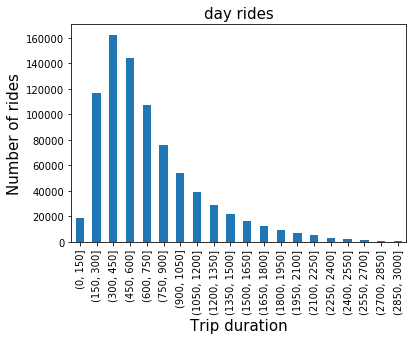

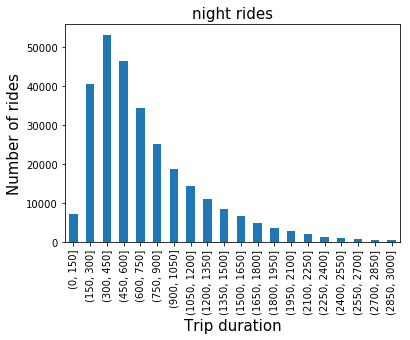

In [15]:
# plotting histograms with pandas
bins = np.arange(0, 3150, 150)
axD = df.tripD.groupby(pd.cut(df.tripD, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axD.set_title("day rides",fontsize=15)
axD.set_ylabel ("Number of rides",fontsize=15)
axD.set_xlabel ("Trip duration",fontsize=15)
axN = df.tripN.groupby(pd.cut(df.tripN, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axN.set_title("night rides",fontsize=15);
axN.set_ylabel ("Number of rides",fontsize=15)
axN.set_xlabel ("Trip duration",fontsize=15)

Figure 1: histogrammed distribution of trip duration by day and night

the largest percentage of tip duration is from 150~900 min

              count_nonzero
tripD                      
(0, 150]           0.002579
(150, 300]         0.005131
(300, 450]         0.003428
(450, 600]         0.013880
(600, 750]         0.021829
(750, 900]         0.024734
(900, 1050]        0.024110
(1050, 1200]       0.020784
(1200, 1350]       0.016229
(1350, 1500]       0.012620
(1500, 1650]       0.008713
(1650, 1800]       0.006251
(1800, 1950]       0.004305
(1950, 2100]       0.003182
(2100, 2250]       0.002513
(2250, 2400]       0.001966
(2400, 2550]       0.001562
(2550, 2700]       0.000890
(2700, 2850]       0.000455
(2850, 3000]       0.000000


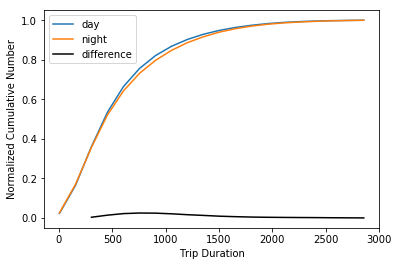

In [16]:
# normalize the data and plot cumulative distributions

csD=df.tripD.groupby(pd.cut(df.tripD, bins)).agg([count_nonzero]).cumsum()

csN=df.tripN.groupby(pd.cut(df.tripN, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csD / csD.max()-csN / csN.max()))

pl.plot(bins[:-1] + 5, csD / csD.max(), label = "day")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "night")
pl.plot(bins[:-1] + 5, np.sqrt(csD / csD.max() - csN / csN.max())**2, 'k-',
        label = "difference")
pl.xlabel("Trip Duration")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

Figure 2: the cumulative distribution of CitiBike trip duration by day and night

The difference is not that obvious.

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?

### **H0: there is no statistical difference in the trip duration distribution of day and night rides**
### $$\alpha = 0.05 $$

In [17]:
ks = scipy.stats.ks_2samp(df.tripD, df.tripN)
print (ks)

Ks_2sampResult(statistic=0.028843043938968815, pvalue=3.5310993935828621e-154)


### KS test tests whether two samples are drawn from the same distribution, it returns KS statistic and two-tailed p-value.
### Here p value=3.53e-154 < 0.05
### Reject null hypothesis, trip duritions in day and night are different.

The scipy.stats KS test already tells me the significance and the p-value. 

The next few cells are here just to show you how you would obtain the same result by hand, but they are **not required**. 

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

## Redo the test with a subset 200 times smaller

In [18]:
np.random.seed(950)
## this cell is for you to redo the test with reducted dataset 
## and tell me what the scipy ks test returned and what it means in terms of NULL HYPOTHESIS
df_short = df.sample(frac=0.005, replace=True)
df_short.head()
len(df_short)

5582

In [19]:
df_short['tripD'].dropna(inplace= True)
df_short['tripN'].dropna(inplace= True)

In [20]:
ks = scipy.stats.ks_2samp(df_short.tripD, df_short.tripN)
print (ks)

Ks_2sampResult(statistic=0.035202056678354195, pvalue=0.13971258951895252)


### Here p value=3.53e-154 < 0.05
### Reject null hypothesis, trip duritions in day and night are different.

# Now retest using a test for correlation. 

That will answer a slightly different question though - formulate the NULL appropriately. The tests for correlations (generally) requires the variable to be paired, so that I can tell if x changes does y change similarly. But the datasets are of different size! You will need to reduce them to the same size. You can do that by subsampling of the data: take only 1 ride every of 200, which you can achieve "slicing and broadcasting" the array or using one of the python function (built in python numpy.random.choice() functions for example: Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

        .. versionadded:: 1.7.0

Parameters
...

But make sure you understand how to use it! there is an option "replace" which you should think about.

In [21]:
# wrangle the data tha has same length and sorted.
tripD2 = np.random.choice(df['tripD'], size=10000)
tripN2 = np.random.choice(df['tripN'], size=10000)
tripD2.sort()
tripN2.sort()
df2 = pd.DataFrame([tripD2,tripN2]).T
df2.columns=["tripD2","tripN2"]

In [22]:
df2.head()

,tripD2,tripN2
0,61.0,61.0
1,64.0,62.0
2,66.0,63.0
3,66.0,63.0
4,68.0,64.0


# Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



### **H0: there is no correlation between the trip duration distribution of day and night rides**
### $$\alpha = 0.05 $$


In [23]:
pearson = scipy.stats.pearsonr(df2.tripD2, df2.tripN2)
print (pearson)

(0.94534393231952984, 0.0)


The Pearson correlation coefficient measures the linear relationship between two datasets. Returns Pearson’s correlation coefficient and 2-tailed p-value. Correlation coefficient varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

### Here Pearson’s correlation coefficient=0.95, p-value=0.0 < 0.05
### Reject null hypothesis, there is a possitive correation betwwen trip duritions of day and night rides.

# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [24]:
spearman = scipy.stats.spearmanr(df2.tripD2, df2.tripN2)
print (spearman)

SpearmanrResult(correlation=0.99999898548896338, pvalue=0.0)


### **H0: there is no correlation between the trip duration distribution of day and night rides**
### $$\alpha = 0.05 $$

Returns Spearman correlation matrix or correlation coefficient and the two-sided p-value.
### Here correlation coefficient=1, p-value=0.0 < 0.05
### Reject null hypothesis, there is a possitive correation between trip duritions of day and night rides.



# 2) age of bikers for trips originating in Manhattan and in Brooklyn

In [25]:
df3 = df_join.copy(deep=True)
df3.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


In [26]:
# import filtered data set to determine the indexes that belong to Manhattan and in Brooklyn
MN = pd.read_csv('MN.csv')
BK = pd.read_csv('BK.csv')

In [27]:
df3.loc[df3.iloc[BK.OID,:].index,'Borough'] = 'BK'
df3.loc[df3.iloc[MN.OID,:].index,'Borough'] = 'MN'

In [28]:
#df is the dataframe where the content of the csv file is stored
df3['ageMN'] = 2017 - df3['birth year'][df3['Borough'] == 'MN']
df3['ageBK'] = 2017 - df3['birth year'][df3['Borough'] == 'BK']

In [29]:
df3.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,Borough,ageMN,ageBK
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00,NaN,NaN,NaN
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00,NaN,NaN,NaN
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00,NaN,NaN,NaN
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00,BK,NaN,48.0
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00,NaN,NaN,NaN


In [30]:
#dropping some data I no longer need
df3.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude', 'usertype',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'birth year',
       'gender', 'date', 'Borough'], axis=1, inplace=True)

In [31]:
# dropping NaN values
df3 = df3.dropna(axis=0, how='all')

In [32]:
df3.head()

,ageMN,ageBK
3,NaN,48.0
33,49.0,NaN
46,49.0,NaN
48,NaN,36.0
59,48.0,NaN


In [33]:
# drop NaN
df3['ageMN'].dropna(inplace= True)
df3['ageBK'].dropna(inplace= True)

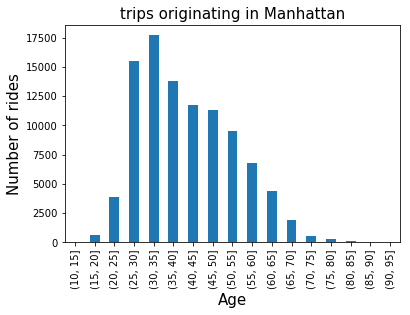

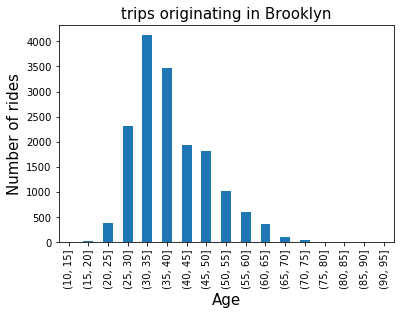

In [34]:
# plotting histograms with pandas
bins = np.arange(10, 99, 5)
axMN = df3.ageMN.groupby(pd.cut(df3.ageMN, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axMN.set_title("trips originating in Manhattan",fontsize=15)
axMN.set_ylabel ("Number of rides",fontsize=15)
axMN.set_xlabel ("Age",fontsize=15)
axBK = df3.ageBK.groupby(pd.cut(df3.ageBK, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axBK.set_title("trips originating in Brooklyn",fontsize=15);
axBK.set_ylabel ("Number of rides",fontsize=15)
axBK.set_xlabel ("Age",fontsize=15)

Figure 3: histogrammed distribution of age by origin boroughs

the largest percentage of riders are 25~45 years old

          count_nonzero
ageMN                  
(10, 15]       0.000000
(15, 20]       0.004238
(20, 25]       0.019415
(25, 30]       0.034365
(30, 35]       0.038687
(35, 40]       0.111446
(40, 45]       0.111114
(45, 50]       0.106687
(50, 55]       0.072417
(55, 60]       0.041036
(60, 65]       0.019347
(65, 70]       0.006263
(70, 75]       0.002938
(75, 80]       0.000909
(80, 85]       0.000000
(85, 90]       0.000000
(90, 95]       0.000000


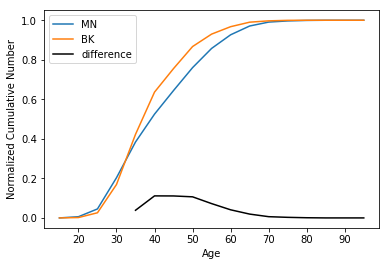

In [35]:
# normalize the data and plot cumulative distributions
csMN=df3.ageMN.groupby(pd.cut(df3.ageMN, bins)).agg([count_nonzero]).cumsum()

csBK=df3.ageBK.groupby(pd.cut(df3.ageBK, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csMN / csMN.max()-csBK / csBK.max()))

pl.plot(bins[:-1] + 5, csMN / csMN.max(), label = "MN")
pl.plot(bins[:-1] + 5, csBK / csBK.max(), label = "BK")
pl.plot(bins[:-1] + 5, np.sqrt(csBK / csBK.max() - csMN / csMN.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

Figure 4: the cumulative distribution of CitiBike riders' ages by origin boroughs

The difference for age group from 40~50 years old are around 10%

# KS tests to compare 2 samples

### **H0: there is no statistical difference in the age distribution for rides originating in Manhattan and in Brooklyn **
### $$\alpha = 0.05 $$

In [36]:
ks = scipy.stats.ks_2samp(df3.ageMN, df3.ageBK)
print (ks)

Ks_2sampResult(statistic=0.14017664990430276, pvalue=1.1580515013040406e-238)


### Here p value=1.158e-238 < 0.05
### Reject null hypothesis, age distribution for rides originating in Manhattan and in Brooklyn are different.

## Redo the test with a subset 200 times smaller

In [44]:
np.random.seed(950)
df3_short = df3.sample(frac=0.005, replace=True)
df3_short.head()
len(df3_short)

571

In [45]:
df3_short['ageMN'].dropna(inplace= True)
df3_short['ageBK'].dropna(inplace= True)

In [46]:
ks = scipy.stats.ks_2samp(df3_short.ageMN, df3_short.ageBK)
print (ks)

Ks_2sampResult(statistic=0.11757911757911765, pvalue=0.23016046947183272)


### Here p value=0.23 > 0.05
### in the case where the subset is 200 times smaller, we can not reject null hypothesis.

# Now retest using a test for correlation. 

In [47]:
ageMN2 = np.random.choice(df3['ageMN'], size=10000)
ageBK2 = np.random.choice(df3['ageBK'], size=10000)
ageMN2.sort()
ageBK2.sort()
df4 = pd.DataFrame([ageMN2,ageBK2]).T
df4.columns=["ageMN2","ageBK2"]

In [48]:
df4.head()

,ageMN2,ageBK2
0,18.0,18.0
1,18.0,20.0
2,18.0,20.0
3,18.0,20.0
4,18.0,20.0


# Pearson's  test for correlation

### **H0: there is no correlation between the age distribution for rides originating in Manhattan and in Brooklyn are different.**
### $$\alpha = 0.05 $$

In [49]:
pearson = scipy.stats.pearsonr(df4.ageMN2, df4.ageBK2)
print (pearson)

(0.99114263678600212, 0.0)


### Here Pearson’s correlation coefficient=0.99, p-value=0.0 < 0.05
### Reject null hypothesis, there is a possitive correation between age distribution for rides originating in Manhattan and in Brooklyn.

# Spearman's  test for correlation

### **H0: there is no correlation between the age distribution for rides originating in Manhattan and in Brooklyn are different.**
### $$\alpha = 0.05 $$

In [50]:
spearman = scipy.stats.spearmanr(df4.ageMN2, df4.ageBK2)
print (spearman)

SpearmanrResult(correlation=0.99906996298570416, pvalue=0.0)


### Here Pearson’s correlation coefficient=1, p-value=0.0 < 0.05
### Reject null hypothesis, there is a possitive correation between age distribution for rides originating in Manhattan and in Brooklyn.